<a href="https://colab.research.google.com/github/ashivashankars/CMPE256_Assignments/blob/main/Hopping_Window_Mean_Aggregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

the current implementation using shift provides a simple offset but doesn't precisely control the hop interval in terms of time. To define a precise hop interval for a time-based window, you can resample your data to the desired hop frequency and then apply the rolling window.

                     value  hopping_mean
timestamp                               
2024-01-01 00:00:00    9.0      9.000000
2024-01-01 01:00:00    6.0      7.500000
2024-01-01 02:00:00    5.0      6.666667
2024-01-01 03:00:00    7.0      6.000000
2024-01-01 04:00:00    5.0      5.666667
...                    ...           ...
2024-01-04 23:00:00    5.0      5.000000
2024-01-05 00:00:00    1.0      4.666667
2024-01-05 01:00:00    9.0      5.000000
2024-01-05 02:00:00    2.0      4.000000
2024-01-05 03:00:00    4.0      5.000000

[100 rows x 2 columns]


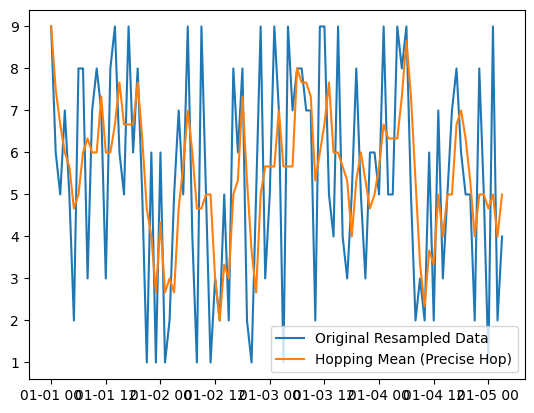

In [1]:
import pandas as pd
import numpy as np
# Create a sample time series dataframe
data = {
'timestamp': pd.date_range(start='2024-01-01', periods=100, freq='h'),
'value': np.random.randint(1, 10, 100)
}
df = pd.DataFrame(data)
# Set the timestamp as the index
df.set_index('timestamp', inplace=True)
# Define hopping window parameters
window_size = '3h' # Window duration
hop_size = '1h' # Hop interval

# Resample the data to the desired hop frequency and then apply rolling window
# This creates a new series with the mean calculated at each hop interval
df_resampled = df.resample(hop_size).mean()
df_resampled['hopping_mean'] = df_resampled['value'].rolling(window=window_size, min_periods=1).mean()


print(df_resampled)
df_resampled = df_resampled.reset_index()
import matplotlib.pyplot as plt
plt.plot(df_resampled['timestamp'], df_resampled['value'], label='Original Resampled Data')
plt.plot(df_resampled['timestamp'], df_resampled['hopping_mean'], label='Hopping Mean (Precise Hop)')
plt.legend()
plt.show()

# missing values in df_resampled

In [2]:
# Check for missing values in df_resampled
missing_values = df_resampled.isnull().sum()
print("Missing values in df_resampled:")
print(missing_values)

Missing values in df_resampled:
timestamp       0
value           0
hopping_mean    0
dtype: int64


In [3]:
# Show summary statistics for df_resampled
display(df_resampled.describe())

,timestamp,value,hopping_mean
count,100,100.000000,100.000000
mean,2024-01-03 01:30:00.000000256,5.440000,5.491667
min,2024-01-01 00:00:00,1.000000,2.000000
25%,2024-01-02 00:45:00,3.000000,4.666667
50%,2024-01-03 01:30:00,5.000000,5.666667
75%,2024-01-04 02:15:00,8.000000,6.416667
max,2024-01-05 03:00:00,9.000000,9.000000
std,NaN,2.563615,1.465154


Resampling: The original DataFrame df has a timestamp index with a frequency of 'h' (hourly). The line df_resampled = df.resample(hop_size).mean() resamples the data to the frequency defined by hop_size, which is '1h' in this case. This means that if there were any timestamps missing at hourly intervals in the original data, resample would fill them. In this specific example, the original data is already hourly, so the resampling doesn't change the timestamps, but it's a crucial step if your original data has irregular timestamps or a different frequency than your desired hop interval. The .mean() part calculates the mean of any values that fall within each new resampled interval (though in this case, with hourly data and hourly resampling, there's only one value per interval).

*   Rolling Window: The line df_resampled['hopping_mean'] = df_resampled['value'].rolling(window=window_size, min_periods=1).mean() calculates the rolling mean.
*   df_resampled['value'] selects the 'value' column from the resampled DataFrame.
*   rolling(window=window_size, min_periods=1) applies a rolling window operation.
*    window=window_size: This sets the size of the rolling window. Since window_size is '3h', the window will include data points within a 3-hour period. Because the data is now resampled to '1h' frequency, this effectively means the window will cover 3 data points (the current one and the two preceding ones).


*    min_periods=1: This specifies that a window requires at least 1 data point to produce a result. Without this, the first few windows (which have fewer than the full window_size data points) would result in NaN.
* .mean(): This calculates the mean of the data points within each rolling window.

















> While both resampling and rolling windows are used for time series data manipulation, they serve different purposes and work together in this code to achieve the precise hopping window.
>
> Here's a breakdown of the difference:
>
> **Resampling:** Resampling is primarily used to change the frequency of your time series data. It can either downsample (decrease the frequency, e.g., from hourly to daily) or upsample (increase the frequency, e.g., from hourly to minute). When resampling, you typically apply an aggregation function (like mean, sum, max, etc.) to summarize the data within the new time intervals. In our code, `df.resample(hop_size).mean()` is used to ensure that our data points are at the desired `hop_size` interval. If the original data wasn't already at this frequency, resampling would create new data points at these intervals by aggregating the original data within each interval.
>
> **Rolling Window:** A rolling window, on the other hand, applies a function (like mean, sum, std, etc.) to a moving window of a fixed size over your data. It calculates the function for the data points within the current window, and then "rolls" or slides the window forward by a specified step (or by one data point by default) and repeats the calculation. It's used to calculate a moving aggregate or statistic over your time series. In our code, `.rolling(window=window_size, min_periods=1).mean()` calculates the mean of the data within a 3-hour window as it slides along the resampled data.
>
> **How they work together in the hopping window:**
>
> In the context of creating a hopping window with a precise hop interval, resampling is used before the rolling window.

>Resampling sets the hop: By resampling the data to the hop_size, we ensure that our data points are aligned with the desired hop interval.
>
>Rolling window defines the aggregation period: The rolling window then operates on this resampled data, calculating the mean over the window_size. Because the underlying data is now at the hop_size frequency, the rolling window effectively "hops" by that precise interval.
>
>So, resampling is about controlling the time points at which the aggregation is calculated (the hop), while the rolling window is about defining the duration over which the aggregation is performed at each of those time points.